In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("UpdatedResumeDataSet.csv")
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [3]:
print(" categories present in resume data set are")
print(df.Category.unique())

 categories present in resume data set are
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print("No of resume present for each category:-")
print(df.Category.value_counts())


No of resume present for each category:-
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Data Science                 40
Sales                        40
Operations Manager           40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


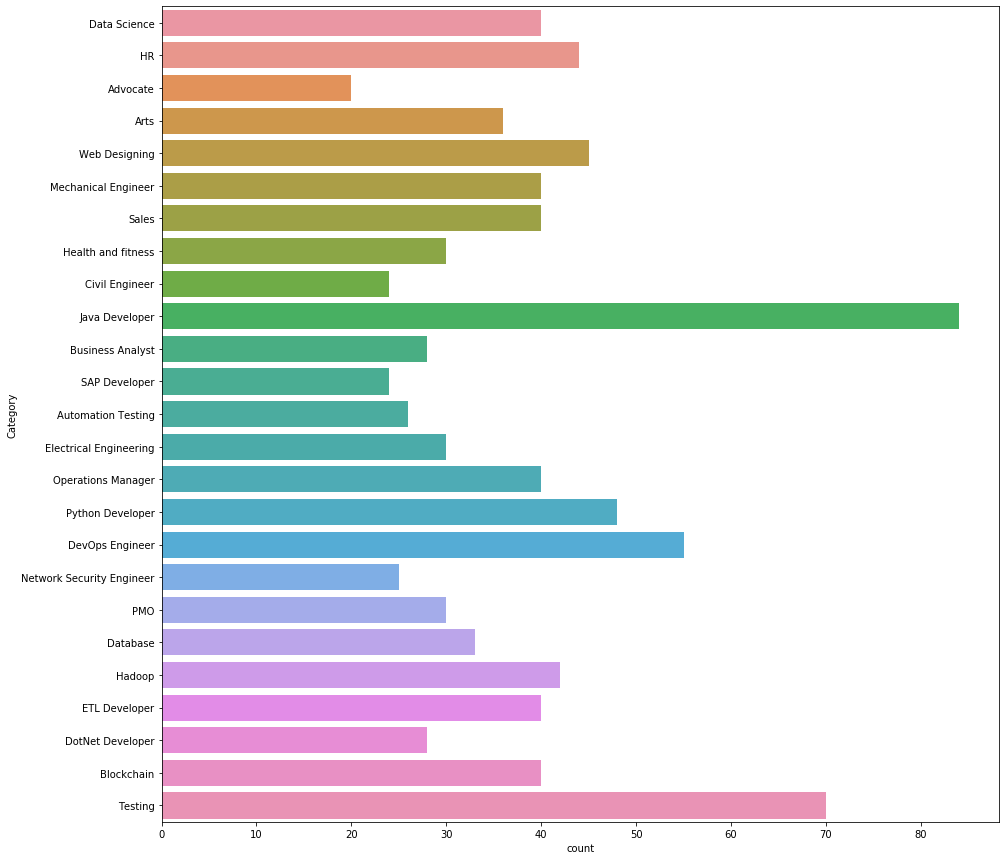

In [5]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.countplot(y="Category", data=df)

In [6]:
import re
def cleaning_resume(text):
    text=re.sub(r'http\S+', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', ' ', text)
    text=re.sub('@\S+', ' ', text)
    text=re.sub(r'[^\w\s]','',text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text) # NON ASCII CHARACTERS REMOVAL
    text = re.sub('\s+', ' ', text)
    return text


In [7]:
df1= df.Resume.apply(lambda x :cleaning_resume(x))

In [8]:
df1

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 BE UITR...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk import word_tokenize
wordset =[]
Sentences = df.Resume.values
cleanedSentences = ""
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 326), ('description', 310), ('1', 290), ('year', 228), ('January', 216), ('Less', 204), ('Data', 196), ('data', 192), ('Maharashtra', 166), ('6', 160), ('Skill', 160), ('Science', 154), ('Python', 148), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Education', 122), ('Learning', 116), ('I', 116), ('India', 114), ('University', 112), ('Web', 106), ('Machine', 104), ('using', 104), ('monthsCompany', 102), ('time', 92), ('Project', 92), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('learning', 86), ('SQL', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72), ('Skills', 70), ('2', 70)]


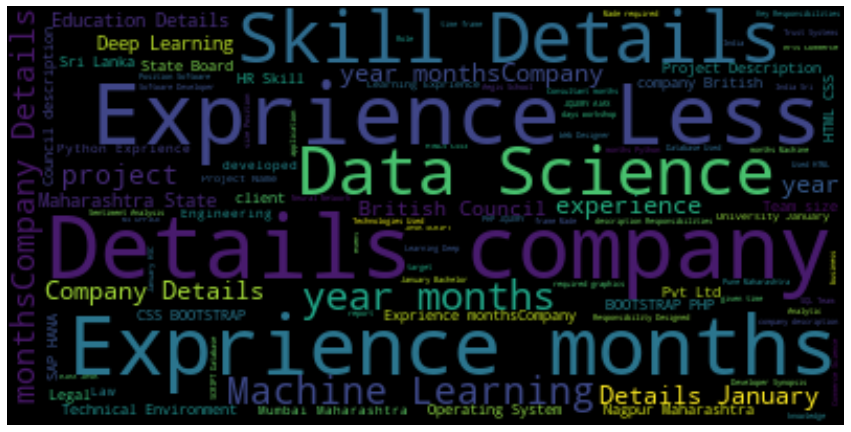

In [10]:

for i in range(0,160):
    cleanedText = cleaning_resume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in set(stopwords.words('english')+['``',"''"]) and word not in string.punctuation:
            wordset.append(word)
    

wordfreqdist = nltk.FreqDist(wordset)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
df['Category']= label_encoder.fit_transform(df['Category']) 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = df1.values
requiredTarget = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
WordFeatures = word_vectorizer.fit_transform(requiredText)


In [13]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                